In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier#KNN method
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

In [292]:

#Load dataset
wine = datasets.load_wine()

In [293]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [294]:
### Load _wine(properties)

In [295]:
wine.data[:5,:]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [296]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [297]:
wine.target[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [298]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [299]:
#Challenge:

In [300]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)

In [301]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [302]:
df['species'] = wine.target

In [303]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,species
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [304]:
#Data Cleaning
df.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
species                           int64
dtype: object

In [305]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
species                         0
dtype: int64

In [306]:
#EDA: Visualizing KNN
#Using matplotlib, create a scatter plot using two features from your DataFrame: 'petal length (cm)' and 'petal width (cm)'. Each dot should be colored according to its species.

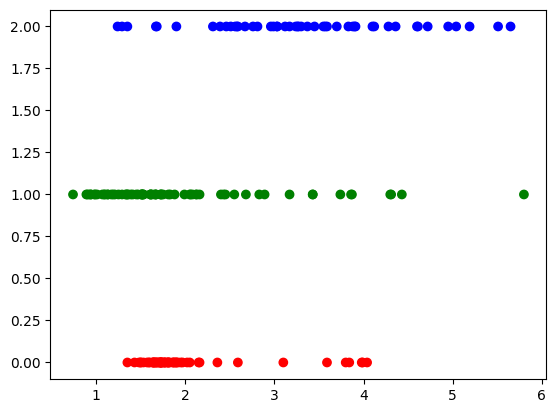

In [307]:
colors = ['red','green','blue']
colors_species = df['species'].map(lambda s:colors[s])
plt.scatter(df["malic_acid"],df["species"],color = colors_species)

In [308]:
#EDA: Pairplot
#Let's expand on the scatter plot created in the previous step. We can use seaborn's .pairplot() method to create scatter plots using all of our

In [309]:
#sns.pairplot(df, hue = 'species')

In [310]:
#Train/Test split
#Use the train_test_split function to split your data into a training set and a holdout set.

In [311]:
X =df[wine.feature_names]
y = df['species']

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,stratify=y)

In [313]:
#StandardScaler
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

In [314]:
#Instantiate KNN
knn = KNeighborsClassifier()

In [315]:
#Cross validation
#In the cell below, use cross_val_score to see what accuracy we can expect from our KNN model.

In [316]:
## Model fitting and evaluation
#fit the model to X_train_scaled, y_train
#score it on X_test_scaled, y_test
#round(cross_val_score(knn, X_train_sc, y_train, cv = 10).mean(),3)

In [317]:
knn.fit(X_train_sc,y_train)

KNeighborsClassifier()

In [318]:
knn.score(X_train_sc,y_train)

0.9924812030075187

In [319]:
knn.score(X_test_sc,y_test)

0.9333333333333333

In [320]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [321]:
knn.score(X_train,y_train)

0.7894736842105263

In [322]:
knn.score(X_test,y_test)

0.7777777777777778

In [323]:
train_scores = []
test_scores = []

for k in range(1,20):
    #create knn with our test
    test_knn = KNeighborsClassifier(n_neighbors = k)

    #cross val score on the traning data
    train_score = cross_val_score(test_knn, X_train_sc, y_train).mean()
    train_scores.append(train_score)

    # fit the model
    test_knn.fit(X_train_sc,y_train)

    #score the model on the test
    test_score = test_knn.score(X_test_sc,y_test)
    test_scores.append(test_score)

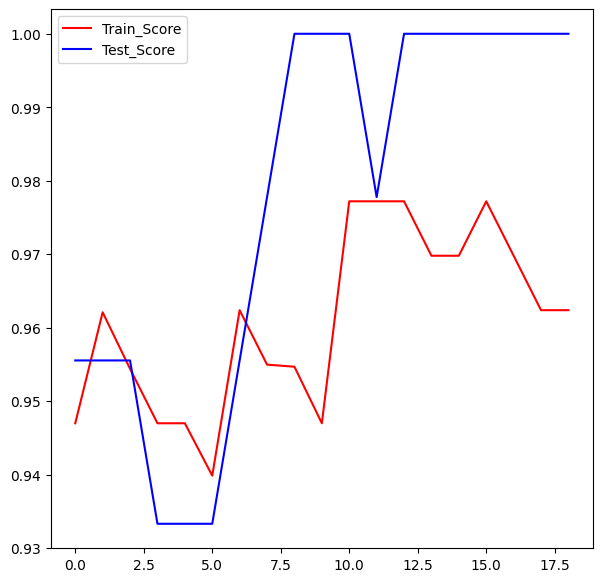

In [324]:
plt.figure(figsize=(7,7))
plt.plot(train_scores, c = 'r', label = 'Train_Score')
plt.plot(test_scores, c = 'b', label = 'Test_Score')
plt.legend()